In [1]:
import boolean2 as b2
import matplotlib.pyplot as plt

Steady state starting at index 2 -> State: DUSP=True, ERK=True, HER2=True, JNK=True, P38=True, herceptin=False, survival=True


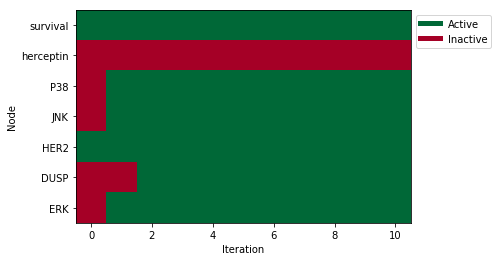

In [2]:
#Construct a Boolean model that contains the above proteins and implements the appropriate logic rules
import boolean2

model_definition = """

HER2 = survival = True

herceptin = JNK = P38 = ERK = DUSP = False

HER2* = not herceptin
ERK* = HER2
JNK* = HER2 or not DUSP
P38* = HER2 or not DUSP
DUSP* = JNK
survival* = ERK or not (JNK and P38)

"""
model = boolean2.Model(text=model_definition, mode='sync')
model.initialize()
model.iterate(steps=10)
model.report_cycles()

graph_1 = list()

for node in model.data:
    graph_1.append(model.data[node])
      
plt.imshow(graph_1, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')

plt.xlabel("Iteration")
plt.ylabel("Node")
plt.yticks(range(0,7), model.data)

legend_labels = ['Active', 'Inactive']
legend_colors = ['#006837', '#A50026']
legend_icon = [plt.Line2D([0], [0], color=color, lw=5) for color in legend_colors]

plt.legend(legend_icon, legend_labels, loc="center left",bbox_to_anchor=(1.0, 0.90))

plt.show()

Cycle of length 4 starting at index 3


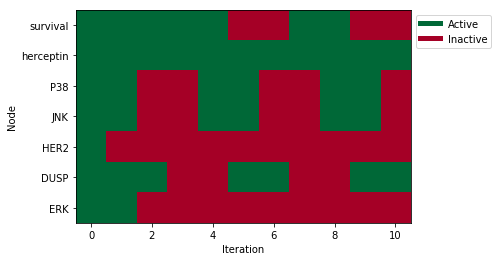

In [3]:
#2. Run the model when Herceptin is applied to HER2 positive breast cancer cells and determine if it converges towards a steady state or a limit cycle. Are the cells expected to survive or not after treatment by Herceptin?

model_definition_herceptin = """

#Using the steady state that was reached

herceptin = HER2 = survival = JNK = P38 = ERK = DUSP = True

HER2* = not herceptin
ERK* = HER2
JNK* = HER2 or not DUSP
P38* = HER2 or not DUSP
DUSP* = JNK
survival* = ERK or not (JNK and P38)

"""

model_herceptin = boolean2.Model(text=model_definition_herceptin, mode='sync')
model_herceptin.initialize()
model_herceptin.iterate(steps=10)
model_herceptin.report_cycles()

graph_2 = list()

for node in model_herceptin.data:
    graph_2.append(model_herceptin.data[node])
        
plt.imshow(graph_2, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')
    
plt.xlabel("Iteration")
plt.ylabel("Node")
plt.yticks(range(0,7), model_herceptin.data)

legend_labels_2 = ['Active', 'Inactive']
legend_colors_2 = ['#006837', '#A50026']
legend_icon_2 = [plt.Line2D([0], [0], color=color, lw=5) for color in legend_colors_2]

plt.legend(legend_icon_2, legend_labels_2, loc="center left",bbox_to_anchor=(1.0, 0.90))

plt.show()
 

Steady state starting at index 3 -> State: DUSP=False, DUSP_inhibitor=True, ERK=False, HER2=False, JNK=True, P38=True, herceptin=True, survival=False


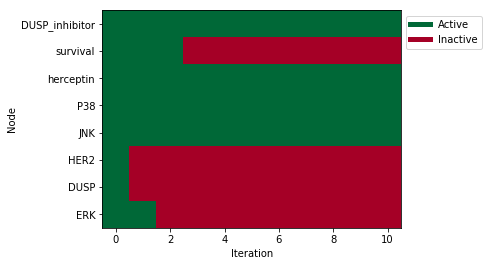

In [4]:
# 3. We have designed an inhibitor of DUSP, which when applied to the cells will keep DUSP permanently inactive. Modify the model accordingly and run it again; are the cells expected to survive or not after treatment by Herceptin and exposure to the DUSP inhibitor?

model_definition_DUSP_inhibitor = """

herceptin = HER2 = survival = JNK = P38 = ERK = DUSP_inhibitor = DUSP = True


HER2* = not herceptin
ERK* = HER2
JNK* = HER2 or not DUSP
P38* = HER2 or not DUSP
DUSP* = not DUSP_inhibitor
survival* = ERK or not (JNK and P38)

"""

model_DUSP_inhibitor = boolean2.Model(text=model_definition_DUSP_inhibitor, mode='sync')
model_DUSP_inhibitor.initialize()
model_DUSP_inhibitor.iterate(steps=10)

graph_3 = list()

for node in model_DUSP_inhibitor.data:
    graph_3.append(model_DUSP_inhibitor.data[node])
    
model_DUSP_inhibitor.report_cycles()

plt.xlabel("Iteration")
plt.ylabel("Node")
plt.yticks(range(0,8), model_DUSP_inhibitor.data)
plt.imshow(graph_3, cmap=plt.cm.get_cmap('RdYlGn'), interpolation='none')  

legend_labels_3 = ['Active', 'Inactive']
legend_colors_3 = ['#006837', '#A50026']
legend_icon_3 = [plt.Line2D([0], [0], color=color, lw=5) for color in legend_colors_3]

plt.legend(legend_icon_3, legend_labels_3, loc="center left",bbox_to_anchor=(1.0, 0.90))

plt.show()


#Kills the cells within the same amount of time but reaches a steady state in which the cells do not survive